# Feature Engineering
- Feature engineering is the process of creating and extracting meaningful features from raw data. It involves transforming the data in a way that enhances the performance of machine learning algorithms.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
dataset1=pd.read_csv('C:/Users/ACER/Desktop/Machine_Learning/Day-7/Data/data.csv')
dataset2=pd.read_csv('C:/Users/ACER/Desktop/Machine_Learning/Day-7/Data/student_data.csv')
dataset3=pd.read_csv('C:/Users/ACER/Desktop/Machine_Learning/Day-7/Data/bank-full.csv',sep=';')


In [129]:
dataset1.sample(5)


,Country,Age,Salary,Purchased
4,Germany,40.0,NaN,Yes
9,France,37.0,67000.0,Yes
3,Spain,38.0,61000.0,No
8,Germany,50.0,83000.0,No
1,Spain,27.0,48000.0,Yes


In [130]:
dataset2.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
299,GP,M,18,U,LE3,T,4,4,teacher,teacher,...,1,4,2,2,2,1,5,16,15,16
222,GP,F,16,U,GT3,T,2,3,services,teacher,...,2,3,1,1,1,3,2,16,16,17
130,GP,F,15,R,GT3,T,3,4,services,teacher,...,4,2,2,2,2,5,0,12,0,0
331,GP,F,17,R,GT3,T,2,4,at_home,other,...,4,4,3,1,1,5,7,12,14,14
215,GP,F,17,U,LE3,T,3,2,other,other,...,4,4,4,1,3,1,2,14,15,15


In [131]:
dataset3.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
8780,30,services,single,secondary,no,773,yes,yes,unknown,4,jun,29,1,-1,0,unknown,no
8526,45,blue-collar,married,secondary,no,-221,yes,yes,unknown,3,jun,170,1,-1,0,unknown,no
6770,51,technician,single,secondary,no,511,yes,yes,unknown,28,may,67,2,-1,0,unknown,no
5931,28,technician,single,tertiary,no,1050,yes,no,unknown,26,may,293,1,-1,0,unknown,no
38506,25,student,single,secondary,no,1919,yes,no,cellular,15,may,264,1,351,4,failure,no


# 1. Feature Transformation

#### i. Missing Values Imputation
> Simple Imputer

In [132]:
x=dataset1[['Country','Age','Salary']].values
y=dataset1.Purchased.values

In [133]:
dataset1.sample(3)


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
2,Germany,30.0,54000.0,No
1,Spain,27.0,48000.0,Yes


In [134]:
from sklearn.impute import SimpleImputer
simple_imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
x[:,1:3]=simple_imputer.fit_transform(x[:,1:3])
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [135]:
country=dataset1.Country.values.reshape(-1,1)



#### ii. Handling Categorical Values
> - One Hot Encoding
> - Ordinal Encoding
> - Label Encoder

***One Hot Encoding***
- It is mostly used in nominal data

In [136]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoding=OneHotEncoder(drop='first',sparse=False)# We have to femove drop the first column, if not then the data will depend on each other 
onehot_encoding.fit_transform(country)

C:\Users\ACER\anaconda3\envs\machinelearning\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.]])

***Ordinal Encoding***
- For this we will use another dataset

In [137]:
dataset3.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28712,26,technician,divorced,tertiary,no,3154,yes,yes,cellular,30,jan,350,3,248,1,failure,no
23562,36,technician,married,secondary,no,278,no,no,cellular,28,aug,121,16,-1,0,unknown,no
27202,35,technician,divorced,secondary,no,0,yes,no,cellular,21,nov,72,1,-1,0,unknown,no
39167,38,admin.,single,secondary,no,1560,yes,no,cellular,18,may,9,2,178,3,failure,no
23288,55,technician,married,secondary,no,570,no,no,cellular,27,aug,94,6,-1,0,unknown,no


In [138]:
dataset3_education=dataset3.education.values.reshape(-1,1)

In [139]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder=OrdinalEncoder()
dataset3_education=ordinal_encoder.fit_transform(dataset3_education)
dataset3.education=dataset3_education.astype(int)

In [170]:
dataset3.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
43176,28,blue-collar,single,1,no,-46,yes,no,cellular,2,mar,525,1,89,11,failure,yes
7260,42,services,married,0,no,91,yes,no,unknown,29,may,87,7,-1,0,unknown,no
26719,40,blue-collar,married,1,no,3765,yes,no,cellular,20,nov,87,2,-1,0,unknown,no
22697,34,technician,single,1,no,1174,no,no,cellular,25,aug,136,17,-1,0,unknown,no
29250,27,admin.,single,2,no,43,no,no,cellular,2,feb,95,3,-1,0,unknown,no
39801,35,management,single,2,no,671,yes,no,cellular,1,jun,128,1,83,1,success,no
5430,41,technician,single,1,no,30,no,no,unknown,23,may,1003,1,-1,0,unknown,no
19503,34,technician,single,1,no,60,no,no,cellular,7,aug,274,2,-1,0,unknown,no
12784,40,admin.,single,1,no,-1,no,no,cellular,7,jul,173,1,-1,0,unknown,no
22955,51,blue-collar,married,0,no,19,no,no,cellular,26,aug,26,10,-1,0,unknown,no


***Label Encoder***
- It is generally used in output columns

In [141]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)

In [171]:
dataset1.Purchased.values,y # Actual value vs label encoded value

(array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
       dtype=object),
 array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1]))

#### iii. Outlier Detection
>

#### iv. Feature Scaling
> - Standardization (Z-score)
> - Normalization(Mean,MinMax,Max Absolute,Robust Scaling


***Standardization***

> it is mostly used in
>- KNN
>- Kmeans
>- Principle Component Analysis
>- Artificial Neural Network
>- Gradient Descent

>- z = (x - mean) / standard deviation


In [143]:
dataset1.sample(10)

,Country,Age,Salary,Purchased
2,Germany,30.0,54000.0,No
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
4,Germany,40.0,NaN,Yes
9,France,37.0,67000.0,Yes
0,France,44.0,72000.0,No
3,Spain,38.0,61000.0,No
1,Spain,27.0,48000.0,Yes
5,France,35.0,58000.0,Yes
8,Germany,50.0,83000.0,No


I have done one hot encoding to the country tab and i will not concate it now i wil do that in next day's notebook, here let's suppose that we have 2 feature in x=[Age,Salary] and y=[Purchased]

In [144]:
x=dataset1[['Age','Salary']]

#Lest implement the concept of standardization

In [145]:
from sklearn.preprocessing import StandardScaler
z_score=StandardScaler()
x_train_norm=z_score.fit_transform(x)

In [146]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train_norm,y,test_size=0.2,random_state=0)

In [147]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((8, 2), (8,), (2, 2), (2,))

C:\Users\ACER\AppData\Local\Temp\ipykernel_4152\2203508710.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,hist=False,ax=ax[0])
C:\Users\ACER\AppData\Local\Temp\ipykernel_4152\2203508710.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_norm,hist=False,ax=ax[1])

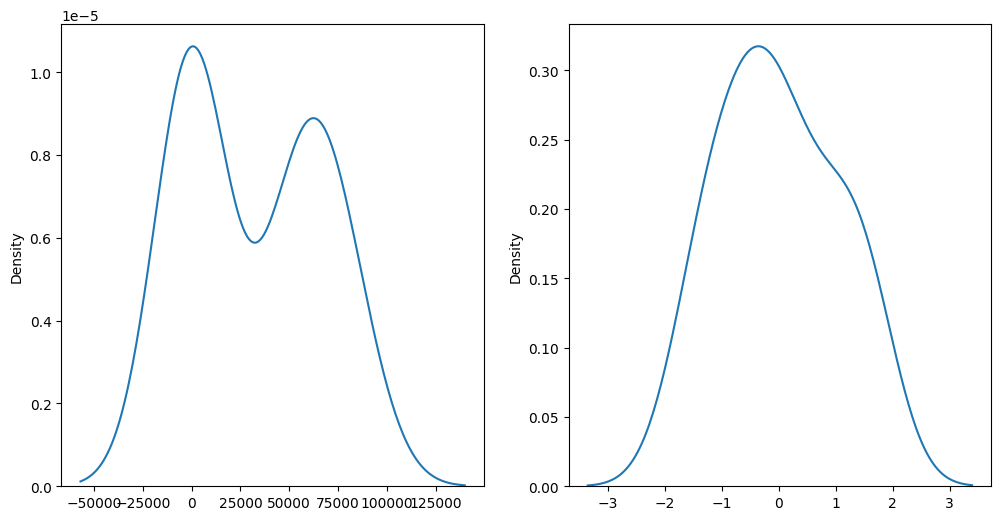

In [160]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.distplot(x,hist=False,ax=ax[0])
sns.distplot(x_train_norm,hist=False,ax=ax[1])
plt.show()

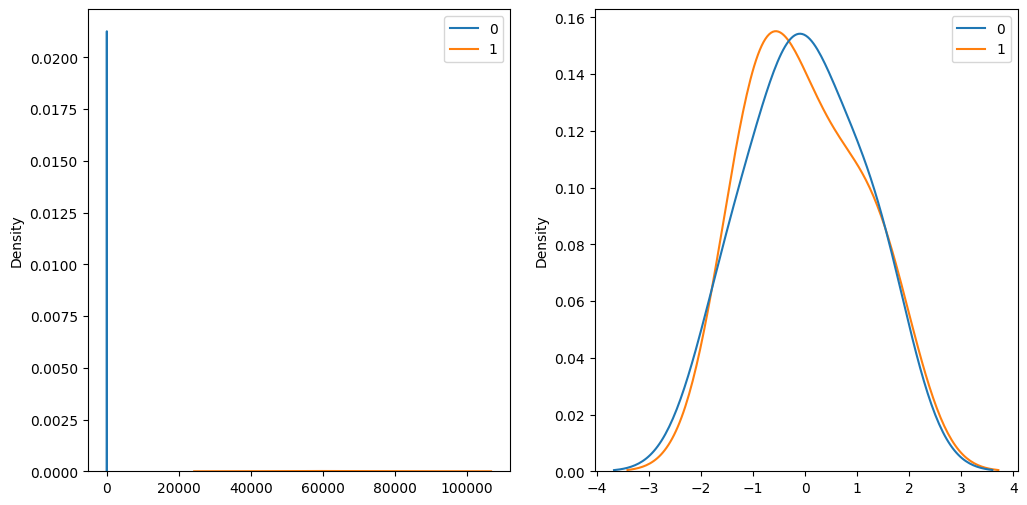

In [149]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.kdeplot(x.values,ax=ax[0])
sns.kdeplot(x_train_norm,ax=ax[1])
plt.show()

In [150]:
x_train_norm[:,0]

array([ 0.71993143, -1.62367514, -1.21009751, -0.10722383,  0.16849459,
       -0.52080146,         nan,  1.27136827,  1.54708669, -0.24508304])

***Normlization***
- Normalization is a technique often applied as part of data preprocessing for machine learning. The goal of normalization is to change the values of numberical columns in the dataset to use a common scale without distoriting differences in the ranges of values or loosing information

Technniques of normalization
- Min max Scaling(90% of the time we will use this technique )
- Mean normalization(if we need to make the data in center the we will use this techniques
)
- Max Abs Scaling(If we have data of 0 or 1 in large number we will use this scaling method)
- Robust Scaling (It is generally used when you have lage number of outliers)


MinMax
-  z = (x - min) / (max - min)


In [166]:
from sklearn.preprocessing import minmax_scale

Mean Normlization
-  z = (x - mean) / (max - min)


In [169]:
# There is no support for mean normalization, so if you want to use this, you have to write code. mannualy 

Max Absolute
-  z = x / max_abs_value



In [165]:
from sklearn.preprocessing import maxabs_scale

Max Absolute
-  z = x / max_abs_value



In [ ]:
from sklearn.preprocessing import robust_scale

# 2. Feature Construction

> - Feature Splitting
> - Grouping


# 3. Feature Selection

> We will select necessary feature only from datasets

# 4. Feature Extraction
>-  DCA,LDA,TSNE
>- It is mostly used when we have high dimensional data like mnist.

# I will post the remaining topic's notebook in the next day's notebook.